<Figure size 1080x1080 with 0 Axes>

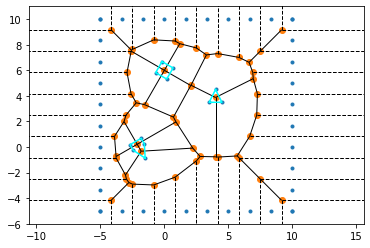

In [1]:
from scipy.spatial import Voronoi, voronoi_plot_2d
import numpy as np
import math
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
class Box2D:
    def __init__(self, ind, x, y, yaw, corner_points=None, v=0.0):
        self.ind = ind
        self.x = x
        self.y = y
        self.yaw = yaw
        self.corner_points = corner_points
        self.v = v

corner_points3 = [[0.5, -0.5, -0.5, 0.5],
                 [0.0, 0.5, -0.5, 0.0]]    
corner_points4 = [[0.5, -0.5, -0.5, 0.5, 0.5],
                 [0.5, 0.5, -0.5, -0.5, 0.5]]        
corner_points5 = [[1.0, 0.0, -0.5, -0.5, 0.0, 1.0],
                 [0.0, 0.5, 0.5, -0.5, -0.5, 0.0]]           
obs0 = Box2D(0, 4.0, 4.0, math.pi/2.0, corner_points=corner_points3)
obs1 = Box2D(1, 0.0, 6.0, math.pi/3.0, corner_points=corner_points4)
obs2 = Box2D(2, -2.0, 0.0, -math.pi/3.0, corner_points=corner_points5)
obs_buf = [obs0, obs1, obs2]
def local2global(x0, y0, yaw0, corner_points):
    R = np.array([[math.cos(yaw0), -math.sin(yaw0)],
                  [math.sin(yaw0), math.cos(yaw0)]])
    corner_arr = np.array(corner_points)
    return np.dot(R, corner_arr)+np.array([[x0],[y0]])
points = []
for i, obs in enumerate(obs_buf):
    gcp = local2global(obs.x, obs.y, obs.yaw, obs.corner_points)
    for j in range(len(gcp[0])-1):
        points.append([gcp[0][j], gcp[1][j], obs.ind])
        
for y in np.linspace(-5, 10, 10):
    points.append([-5, y, -1])
    points.append([10, y, -1])
for x in np.linspace(-5, 10, 10):
    points.append([x, -5, -1])
    points.append([x, 10, -1])


points = np.array(points)

# plt.scatter(points[:,0], points[:,1], color='k')

vor = Voronoi(points[:, 0:2])
fig = voronoi_plot_2d(vor)
fig.figsize=(15, 15)
for i, obs in enumerate(obs_buf):
    gcp = local2global(obs.x, obs.y, obs.yaw, obs.corner_points)
    plt.plot(gcp[0], gcp[1], 'cyan')

plt.axis("equal")
plt.axis([-6, 11, -6, 11])
plt.show()

[[-4.16666667e+00 -4.16666667e+00]
 [ 2.22211740e+00 -8.25893055e-02]
 [-2.77437594e+00 -2.77437594e+00]
 [ 9.07347487e-01  1.96723299e+00]
 [ 2.79424695e+00 -7.37795692e-01]
 [ 2.50000000e+00 -1.08182141e+00]
 [ 4.00000000e+00 -7.61437908e-01]
 [ 4.16666667e+00 -7.84313725e-01]
 [-2.50000000e+00 -2.89605607e+00]
 [ 2.50000000e+00  7.75000687e+00]
 [-2.99897621e+00  2.50000000e+00]
 [-2.19981079e+00  3.45979093e+00]
 [ 7.22222222e+00  2.50000000e+00]
 [ 7.27272727e+00  4.16666667e+00]
 [ 6.66666667e+00  8.33333333e-01]
 [ 5.69444444e+00 -6.94444444e-01]
 [ 9.16666667e+00 -4.16666667e+00]
 [ 8.33333333e-01 -2.35850506e+00]
 [-8.33333333e-01 -2.96324995e+00]
 [-2.96779592e+00 -2.50000000e+00]
 [ 2.06137142e+00  4.80986665e+00]
 [ 7.09148984e-01  2.34132730e+00]
 [-1.54951779e+00  3.31615646e+00]
 [-2.92190701e+00  5.83333333e+00]
 [-2.60649133e+00  4.16666667e+00]
 [-4.16666667e+00  9.16666667e+00]
 [ 5.83333333e+00  7.00757576e+00]
 [ 4.16666667e+00  7.31060606e+00]
 [ 6.62414966e+00  6

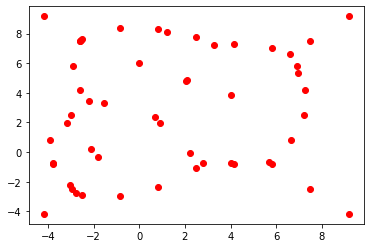

In [4]:
vertices = vor.vertices
import networkx as nx
G = nx.Graph()
for rv, rp in zip(vor.ridge_vertices, vor.ridge_points):
    if rv[0] >= 0 and rv[1] >= 0:
        p1_ind = points[rp[0], 2]
        p2_ind = points[rp[1], 2]
        if p1_ind != -1 and p1_ind == p2_ind:
            continue
        dx = vertices[rv[0], 0] - vertices[rv[1], 0]
        dy = vertices[rv[0], 1] - vertices[rv[1], 1]
        w = math.sqrt(dx*dx + dy*dy)
        
        G.add_edge(rv[0], rv[1], weight = w)
        
        
print(vertices)   
plt.scatter(vertices[:,0], vertices[:, 1], color='red')
plt.show()

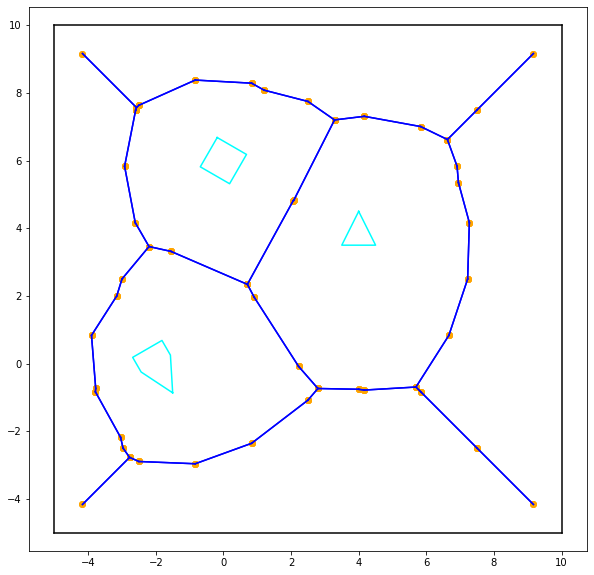

In [7]:
plt.figure(figsize=(10, 10))
for n, nbrs in G.adj.items():
    for nbr, eattr in nbrs.items():
        plt.scatter(vertices[n,0], vertices[n,1], color='orange')
        plt.scatter(vertices[nbr, 0], vertices[nbr, 1], color='orange')
        plt.plot([vertices[n, 0], vertices[nbr, 0]], [vertices[n, 1], vertices[nbr, 1]], 'b')
        
plt.plot(-5*np.ones(10), np.linspace(-5, 10, 10), 'k')
plt.plot(10*np.ones(10), np.linspace(-5, 10, 10), 'k')
plt.plot(np.linspace(-5, 10, 10), -5*np.ones(10), 'k')
plt.plot(np.linspace(-5, 10, 10), 10*np.ones(10), 'k')      
for i, obs in enumerate(obs_buf):
    gcp = local2global(obs.x, obs.y, obs.yaw, obs.corner_points)
    plt.plot(gcp[0], gcp[1], 'cyan')
plt.axis("equal")
plt.show()

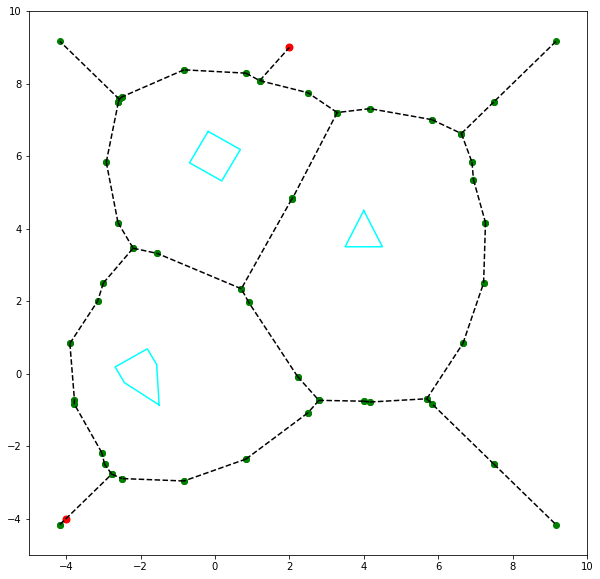

In [8]:
def line_segment_cross_judge(Ax1, Ay1, Ax2, Ay2, Bx1, By1, Bx2, By2):
    if ((max(Ax1,Ax2)<=min(Bx1,Bx2) or min(Ax1,Ax2)>=max(Bx1,Bx2)) or
        (max(Ay1,Ay2)<=min(By1,By2) or min(Ay1,Ay2)>=max(By1,By2))):
        return False
    if (((Bx1-Ax1)*(Ay2-Ay1)-(By1-Ay1)*(Ax2-Ax1))*((Bx2-Ax1)*(Ay2-Ay1)-(By2-Ay1)*(Ax2-Ax1))<0 and
        ((Ax1-Bx1)*(By2-By1)-(Ay1-By1)*(Bx2-Bx1))*((Ax2-Bx1)*(By2-By1)-(Ay2-By1)*(Bx2-Bx1))<0):
        return True
    return False

cps_buf = []
for obs in obs_buf:
    gcp = local2global(obs.x, obs.y, obs.yaw, obs.corner_points)
    cps_buf.append(gcp)

Bx1_arr = []
By1_arr = []
Bx2_arr = []
By2_arr = []
for i in range(len(cps_buf)):
    cps = cps_buf[i]
    for j in range(len(cps[0])-1):
        Bx1_arr.append(cps[0, j])
        By1_arr.append(cps[1, j])
        Bx2_arr.append(cps[0, j+1])
        By2_arr.append(cps[1, j+1])
Bx1_arr = np.array(Bx1_arr)
By1_arr = np.array(By1_arr)
Bx2_arr = np.array(Bx2_arr)
By2_arr = np.array(By2_arr)


start_pos = [-4.0, -4.0]
goal_pos = [2.0, 9.0]

# start link to voronoi graph
min_dist_start = 99999.0
min_ind = -1
for index, node in enumerate(vertices):
    # start    
    is_drivable = True
    Ax1, Ay1 = start_pos[0], start_pos[1]
    Ax2, Ay2 = vertices[index, 0], vertices[index, 1]
    for k in range(len(Bx1_arr)):
        if line_segment_cross_judge(Ax1, Ay1, Ax2, Ay2, Bx1_arr[k], By1_arr[k], Bx2_arr[k], By2_arr[k]):
            is_drivable = False
            break
    if is_drivable:
        dist = math.sqrt((Ax2-Ax1)**2+(Ay2-Ay1)**2)
        if min_dist_start > dist: 
            min_dist_start = dist
            min_ind = index
if min_ind >= 0:
    G.add_edge(len(vertices), min_ind, weight=min_dist_start)   
    
# goal link to voronoi graph
min_dist_goal = 99999.0
min_ind = -1
for index, node in enumerate(vertices):
    is_drivable = True
    Ax1, Ay1 = goal_pos[0], goal_pos[1]
    Ax2, Ay2 = vertices[index, 0], vertices[index, 1]
    for k in range(len(Bx1_arr)):
        if line_segment_cross_judge(Ax1, Ay1, Ax2, Ay2, Bx1_arr[k], By1_arr[k], Bx2_arr[k], By2_arr[k]):
            is_drivable = False
            break
    if is_drivable:
        dist = math.sqrt((Ax2-Ax1)**2+(Ay2-Ay1)**2)
        if min_dist_goal > dist: 
            min_dist_goal = dist
            min_ind = index
if min_ind >= 0:        
    G.add_edge(len(vertices)+1, min_ind, weight=min_dist_goal)  
    
vertices = np.vstack((vertices, start_pos))
vertices = np.vstack((vertices, goal_pos))

plt.figure(figsize=(10, 10)) 
for e in list(G.edges):
    node0 = vertices[e[0]]
    node1 = vertices[e[1]]
    plt.plot([node0[0], node1[0]], [node0[1], node1[1]], '--k')
    plt.scatter([node0[0], node1[0]], [node0[1], node1[1]], color='green')
for cps in cps_buf:
    plt.plot(cps[0],cps[1], 'cyan')
       
plt.scatter(-4.0, -4.0, color='red', linewidth=2)
plt.scatter(2.0, 9.0, color='red', linewidth=2)
plt.axis([-5, 10, -5, 10])
plt.show() 

[[-4.         -4.        ]
 [-4.16666667 -4.16666667]
 [-2.77437594 -2.77437594]
 [-2.96779592 -2.5       ]
 [-3.04007947 -2.18401278]
 [-3.78549124 -0.83333333]
 [-3.77608474 -0.73674787]
 [-3.9001013   0.83333333]
 [-3.15391361  1.998637  ]
 [-2.99897621  2.5       ]
 [-2.19981079  3.45979093]
 [-2.60649133  4.16666667]
 [-2.92190701  5.83333333]
 [-2.59429906  7.49781926]
 [-2.59430646  7.5       ]
 [-2.57024144  7.57024144]
 [-2.5         7.6369535 ]
 [-0.83333333  8.38243619]
 [ 0.83333333  8.2904789 ]
 [ 1.20329762  8.08417262]
 [ 2.          9.        ]]


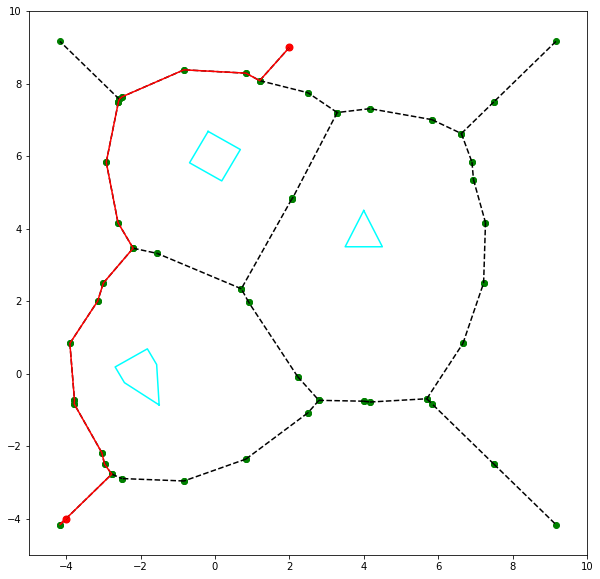

In [12]:
plt.figure(figsize=(10, 10)) 
path = nx.shortest_path(G, len(vertices)-2, len(vertices)-1, weight="weight")
for e in list(G.edges):
    node0 = vertices[e[0]]
    node1 = vertices[e[1]]
    plt.plot([node0[0], node1[0]], [node0[1], node1[1]], '--k')
    plt.scatter([node0[0], node1[0]], [node0[1], node1[1]], color='green')
print(np.array(vertices)[path])
for cps in cps_buf:
    plt.plot(cps[0],cps[1], 'cyan')
plt.plot(np.array(vertices)[path][:,0], np.array(vertices)[path][:,1], 'r')
plt.scatter(-4.0, -4.0, color='red', linewidth=2)
plt.scatter(2.0, 9.0, color='red', linewidth=2)
plt.axis([-5, 10, -5, 10])
plt.show() 


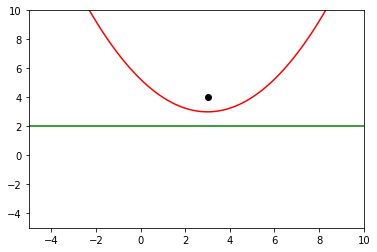

In [34]:
import numpy as np
import matplotlib.pyplot as plt

def y_fun(xp, yp, yv, x):
    return ((x-xp)**2-(yv**2-yp**2))/(2*yp-2*yv)

xp, yp = 3.0, 4.0
yv = 2.0

y = y_fun(xp1, yp1, yv, x)

plt.scatter(xp, yp, color='k')
plt.plot(x, y, 'r')
plt.plot(x, cy*np.ones(100), 'g')
plt.axis([-5, 10, -5, 10])
plt.show()

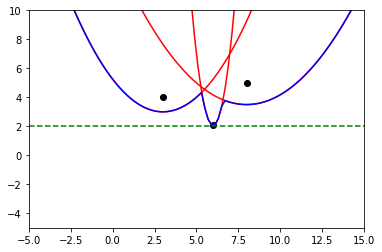

In [42]:
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# set up matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

x = np.linspace(-5, 15, 100)
def y_fun(xp, yp, yv, x):
    return ((x-xp)**2-(yv**2-yp**2))/(2*yp-2*yv)

def crosspoints(xp1, yp1, xp2, yp2, yv):
    cps = []
    a1 = yp1*yp1 - yv*yv
    a2 = yp2*yp2 - yv*yv
    b1 = 2*(yp1 - yv)
    b2 = 2*(yp2 - yv)
    a = b2 - b1
    b = 2*b1*xp2 - 2*b2*xp1
    c = b2*xp1*xp1 - b1*xp2*xp2 - a2*b1 + a1*b2
    b24ac = b*b - 4*a*c
    if a == 0: return cps
    if b24ac > 0:
        x1 = (-b + math.sqrt(b24ac))/(2*a)
        y1 = y_fun(xp1, yp1, yv, x1)
        cps.append([x1, y1])
        x2 = (-b - math.sqrt(b24ac))/(2*a)
        y2 = y_fun(xp1, yp1, yv, x2)
        cps.append([x2, y2])
    elif bsqrt4ac == 0:
        x = -b/(2*a)
        y = y_fun(xp1, yp1, yv, x)
        cps.append([x, y])
    return cps
    
xp1, yp1 = 3.0, 4.0
xp2, yp2 = 6.0, 2.1
xp3, yp3 = 8.0, 5.0
yv = 2.0
y1 = y_fun(xp1, yp1, yv, x)
y2 = y_fun(xp2, yp2, yv, x)
y3 = y_fun(xp3, yp3, yv, x)
plt.scatter(xp1, yp1, color='k')
plt.plot(x, y1, 'r')
plt.scatter(xp2, yp2, color='k')
plt.plot(x, y2, 'r')
plt.scatter(xp3, yp3, color='k')
plt.plot(x, y3, 'r')

plt.plot(x, [min(y1[i], min(y2[i], y3[i])) for i in range(len(y1))], 'blue')


plt.plot(x, yv*np.ones(100), '--g')

plt.axis([-5, 15, -5, 10])
plt.show()

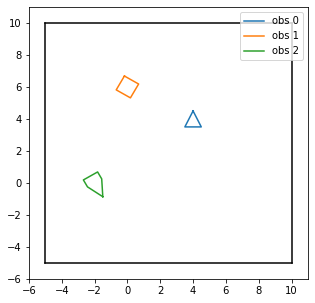

In [56]:
import numpy as np
import math
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
class Box2D:
    def __init__(self, x, y, yaw, corner_points=None, v=0.0):
        self.x = x
        self.y = y
        self.yaw = yaw
        self.corner_points = corner_points
        self.v = v

corner_points3 = [[0.5, -0.5, -0.5, 0.5],
                 [0.0, 0.5, -0.5, 0.0]]    
corner_points4 = [[0.5, -0.5, -0.5, 0.5, 0.5],
                 [0.5, 0.5, -0.5, -0.5, 0.5]]        
corner_points5 = [[1.0, 0.0, -0.5, -0.5, 0.0, 1.0],
                 [0.0, 0.5, 0.5, -0.5, -0.5, 0.0]]           
obs0 = Box2D(4.0, 4.0, math.pi/2.0, corner_points=corner_points3)
obs1 = Box2D(0.0, 6.0, math.pi/3.0, corner_points=corner_points4)
obs2 = Box2D(-2.0, 0.0, -math.pi/3.0, corner_points=corner_points5)
obs_buf = [obs0, obs1, obs2]
def local2global(x0, y0, yaw0, corner_points):
    R = np.array([[math.cos(yaw0), -math.sin(yaw0)],
                  [math.sin(yaw0), math.cos(yaw0)]])
    corner_arr = np.array(corner_points)
    return np.dot(R, corner_arr)+np.array([[x0],[y0]])

plt.plot(-5*np.ones(10), np.linspace(-5, 10, 10), 'k')
plt.plot(10*np.ones(10), np.linspace(-5, 10, 10), 'k')
plt.plot(np.linspace(-5, 10, 10), -5*np.ones(10), 'k')
plt.plot(np.linspace(-5, 10, 10), 10*np.ones(10), 'k')
for i, obs in enumerate(obs_buf):
    gcp = local2global(obs.x, obs.y, obs.yaw, obs.corner_points)
    plt.plot(gcp[0], gcp[1], label="obs "+str(i))
    plt.axis([-6, 11, -6, 11])
    
plt.legend(loc="upper right")

plt.show()